In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
zip_dir_base = os.getcwd()

archive_dir = zip_dir_base + '\\archive'
train_dir = archive_dir + '\\train'
test_dir = archive_dir + '\\test'
val_dir = archive_dir + '\\val'

In [3]:
train_normal_dir = os.path.join(train_dir, 'normal')
train_pneumonia_dir = os.path.join(train_dir, 'pneumonia')

test_normal_dir = os.path.join(test_dir, 'normal')
test_pneumonia_dir = os.path.join(test_dir, 'pneumonia')

val_normal_dir = os.path.join(val_dir, 'normal')
val_pneumonia_dir = os.path.join(val_dir, 'pneumonia')

In [4]:
num_normal_tr = len(os.listdir(train_normal_dir))
num_pneumonia_tr = len(os.listdir(train_pneumonia_dir))

num_normal_test = len(os.listdir(test_normal_dir))
num_pneumonia_test = len(os.listdir(test_pneumonia_dir))

num_normal_val = len(os.listdir(val_normal_dir))
num_pneumonia_val = len(os.listdir(val_pneumonia_dir))

In [5]:
print('Здоровых в тренировочном наборе: ', num_normal_tr)
print('Больных в тренировочном наборе: ', num_pneumonia_tr)

print('Здоровых в тестовом наборе: ', num_normal_test)
print('Больных в тестовом наборе: ', num_pneumonia_test)

print('Здоровых в валидационном наборе: ', num_normal_val)
print('Больных в валидационном наборе: ', num_pneumonia_val)

print('Всего здоровых: ', num_normal_tr  + num_normal_val)
print('Всего больных: ', num_pneumonia_tr + num_pneumonia_val)

Здоровых в тренировочном наборе:  1341
Больных в тренировочном наборе:  3875
Здоровых в тестовом наборе:  234
Больных в тестовом наборе:  390
Здоровых в валидационном наборе:  8
Больных в валидационном наборе:  8
Всего здоровых:  1349
Всего больных:  3883


In [6]:
BATCH_SIZE = 100
IMG_SHAPE = 224

In [7]:
#тут если будут плохие результаты добавить аугментацию
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode='nearest')
#test_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

#test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
#                                                          directory=test_dir,
#                                                          shuffle=False,
#                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                          class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=val_dir,
                                                          shuffle=False,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
sample_training_images, _ = next(train_data_gen)

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

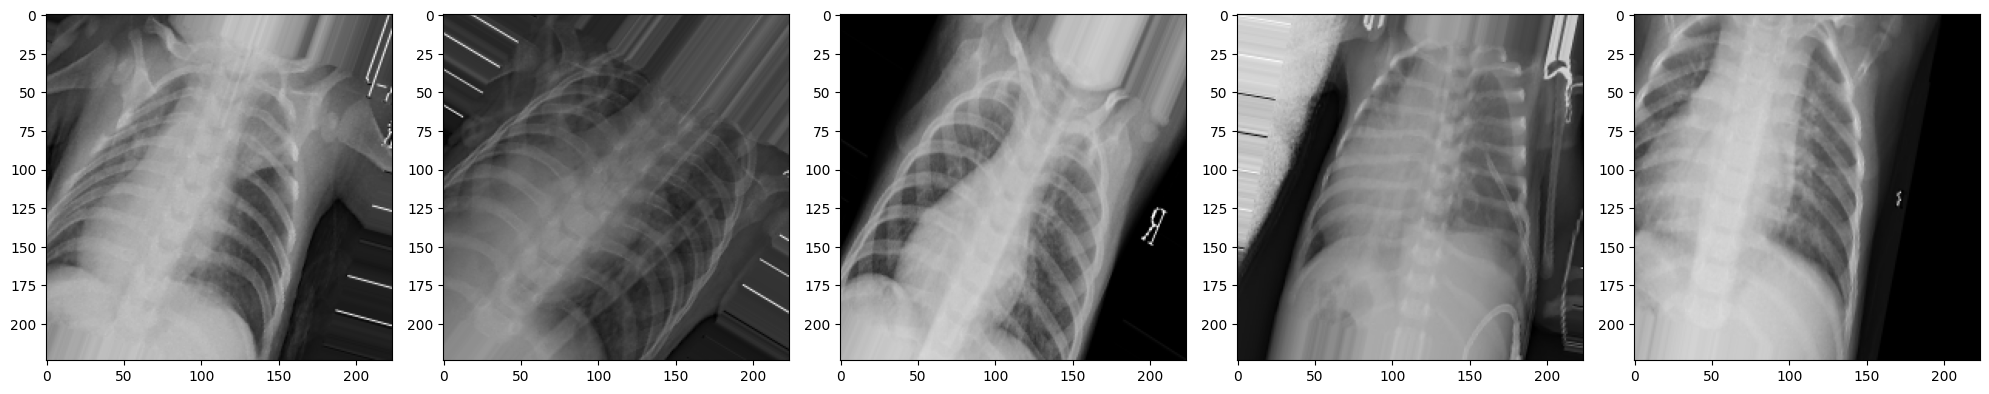

In [11]:
plotImages(sample_training_images[:5])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [14]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
EPOCHS = 30

In [16]:
history = model.fit(train_data_gen,
                   steps_per_epoch=int(np.ceil((num_normal_tr + num_pneumonia_tr) / float(BATCH_SIZE))),
                   epochs=EPOCHS,
                   validation_data=val_data_gen)

Epoch 1/30
53/53 [==============================] - 58s 989ms/step - loss: 0.7081 - accuracy: 0.7270 - val_loss: 0.6193 - val_accuracy: 0.6250
Epoch 2/30
53/53 [==============================] - 53s 997ms/step - loss: 0.3496 - accuracy: 0.8349 - val_loss: 0.8455 - val_accuracy: 0.6250
Epoch 3/30
53/53 [==============================] - 53s 1s/step - loss: 0.3214 - accuracy: 0.8602 - val_loss: 0.6716 - val_accuracy: 0.7500
Epoch 4/30
53/53 [==============================] - 54s 1s/step - loss: 0.3065 - accuracy: 0.8576 - val_loss: 1.1340 - val_accuracy: 0.5625
Epoch 5/30
53/53 [==============================] - 53s 1s/step - loss: 0.2911 - accuracy: 0.8712 - val_loss: 0.7155 - val_accuracy: 0.6250
Epoch 6/30
53/53 [==============================] - 53s 1s/step - loss: 0.2726 - accuracy: 0.8821 - val_loss: 0.6962 - val_accuracy: 0.6250
Epoch 7/30
53/53 [==============================] - 53s 999ms/step - loss: 0.2645 - accuracy: 0.8850 - val_loss: 0.5520 - val_accuracy: 0.8125
Epoch 8/30


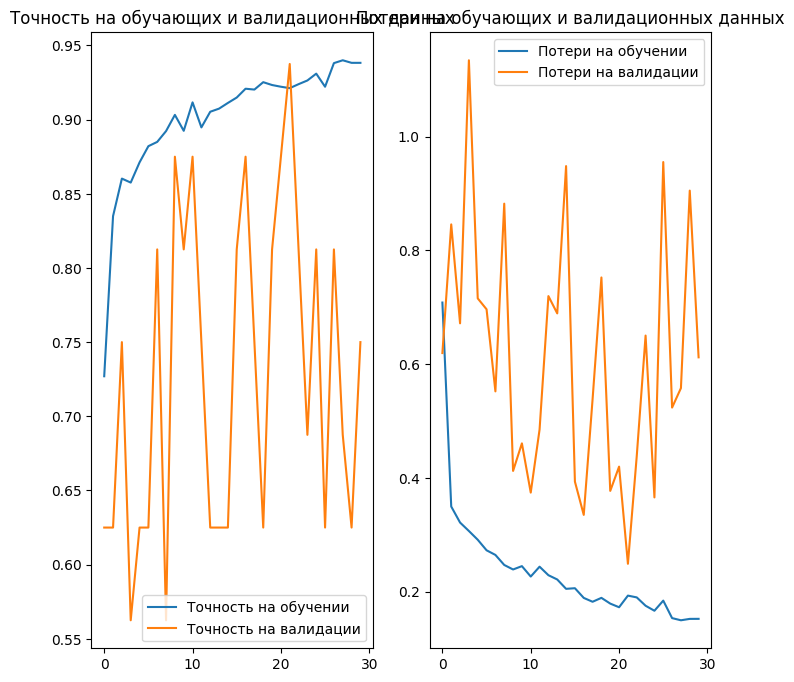

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

In [18]:
# Define a standard size for all images
IMG_SIZE = (IMG_SHAPE, IMG_SHAPE)

def resize_images(path, class_name):
    images = []
    for img_name in os.listdir(path + '/' + class_name):
        img = tf.keras.preprocessing.image.load_img(path + '/' + class_name + '/' + img_name, target_size=IMG_SIZE)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    return images

In [22]:
# Preprocess the test set images
normal_test_images = resize_images(test_dir, "normal")
pneumonia_test_images = resize_images(test_dir, "pneumonia")

X_test = normal_test_images + pneumonia_test_images
y_test = [0]*len(normal_test_images) + [1]*len(pneumonia_test_images)

# Normalize the test images
X_test = [img/255.0 for img in X_test]

# Predict on the test set
y_pred_probs = model.predict(np.array(X_test))
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

20/20 [==============================] - 0s 15ms/step


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8894
Precision: 0.8673
Recall: 0.9718
F1 Score: 0.9166


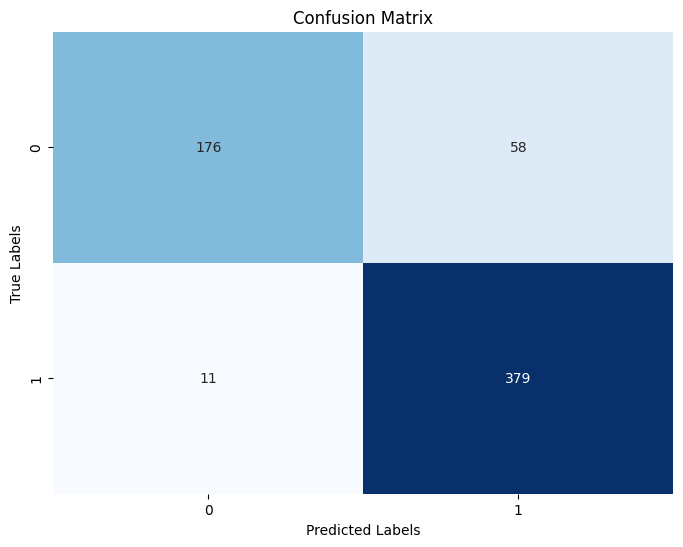

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
